In [71]:
from vaiutils import path_consts, plot_images, summarize_tensor
from scipy.misc import imread
from glob import glob

In [285]:
for k,v in path_consts('COCO'):
    exec(k+'=v')

In [186]:
spherical_range_tensor = np.zeros((3, 2))
spherical_range_tensor[0, 0] = np.sqrt(3)
spherical_range_tensor[0, 1] = np.sqrt(3) * 256
spherical_range_tensor[1, 0] = np.arccos(256 / np.sqrt(256 ** 2 + 2))
spherical_range_tensor[1, 1] = np.arccos(1 / np.sqrt(2 * 256 ** 2 + 1))
spherical_range_tensor[2, 1] = np.arctan(256)
spherical_range_tensor[2, 0] = np.pi / 2 - spherical_range_tensor[2, 1]

In [250]:
def to_spherical(cartesian_tensor):
    cartesian_tensor = cartesian_tensor.astype(float) + 1
    
    x, y, z = tuple(np.take(cartesian_tensor, i, -1) for i in range(3))

    r = np.linalg.norm(cartesian_tensor, axis=-1)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    
    spherical_tensor = np.stack([r, theta, phi], -1)
    
    spherical_tensor = (spherical_tensor - spherical_range_tensor[:, 0]) * 255 / (spherical_range_tensor[:, 1] - spherical_range_tensor[:, 0])
    return spherical_tensor

In [258]:
def to_cartesian(spherical_tensor):
    spherical_tensor = spherical_tensor.astype(float) * (spherical_range_tensor[:, 1] - spherical_range_tensor[:, 0]) / 255 + spherical_range_tensor[:, 0]
    
    r, theta, phi = tuple(np.take(spherical_tensor, i, -1) for i in range(3))

    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    cartesian_tensor = np.stack([x, y, z], -1)
    
    return cartesian_tensor - 1

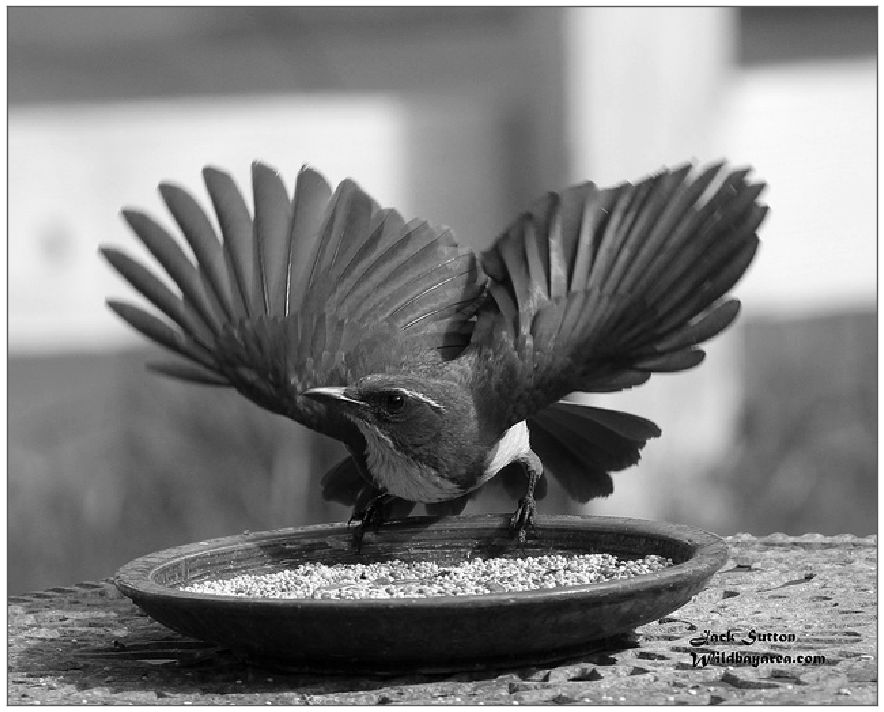

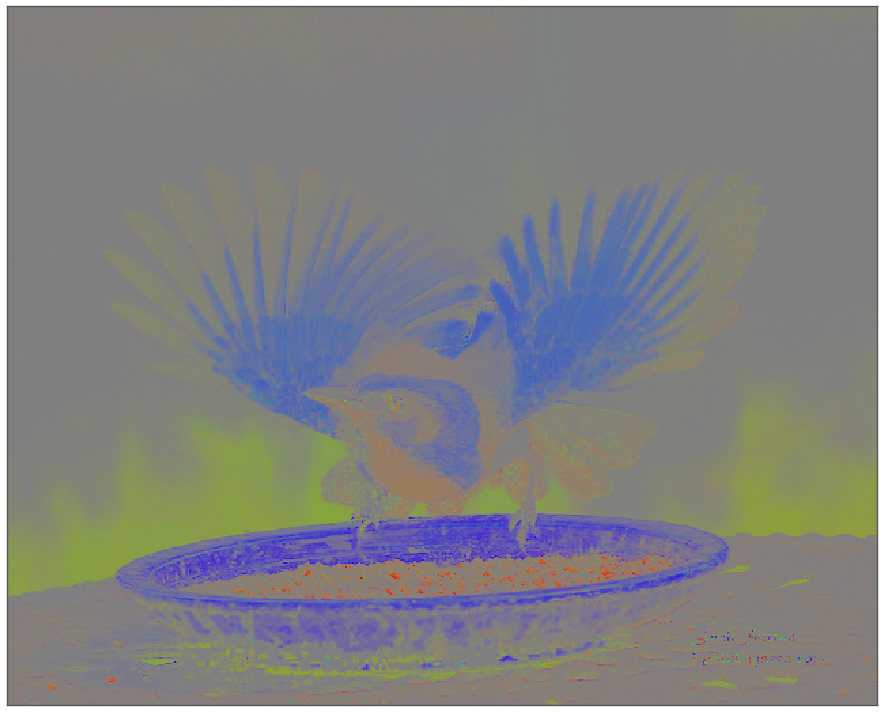

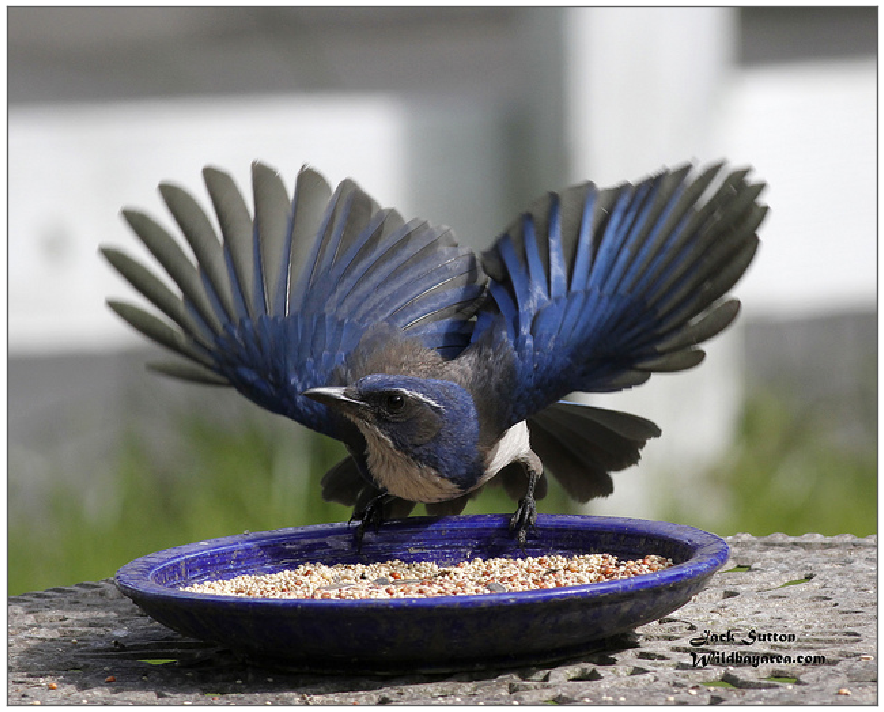

In [307]:
filenames = glob(DIR_DATA + '/val2017/*.jpg')
sample_img = imread(filenames[randint(len(filenames))])
spherical_sample_img = to_spherical(sample_img)

spherical_sample_img[:, :, 0] = 127.5

plot_images([to_spherical(sample_img)[:, :, 0]])
plot_images([to_cartesian(spherical_sample_img)])
plot_images([sample_img])

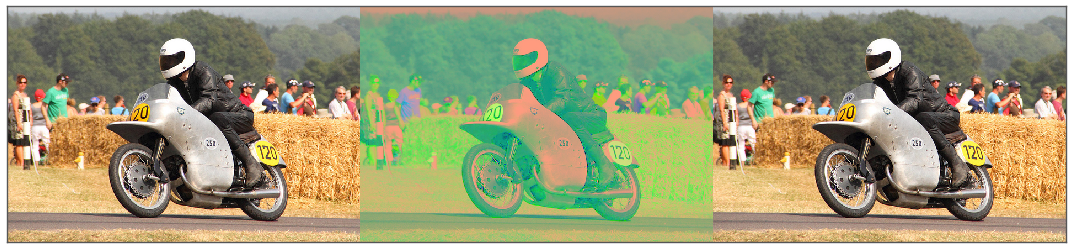

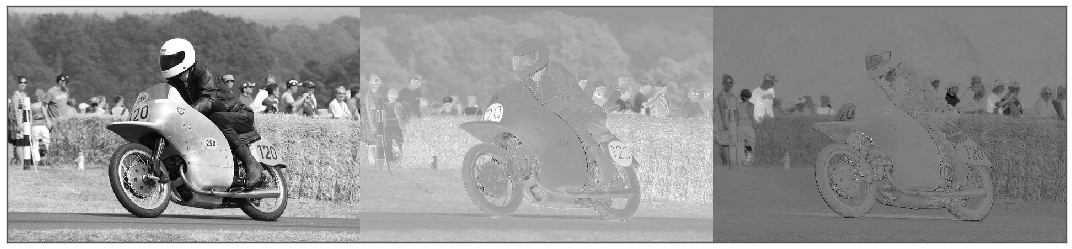

In [295]:
filenames = glob(DIR_DATA + '/val2017/*.jpg')
sample_img = imread(filenames[randint(len(filenames))])
spherical_sample_img = to_spherical(sample_img)

plot_images([sample_img, spherical_sample_img, to_cartesian(spherical_sample_img)])
plot_images(np.transpose(spherical_sample_img, [2, 0, 1]))

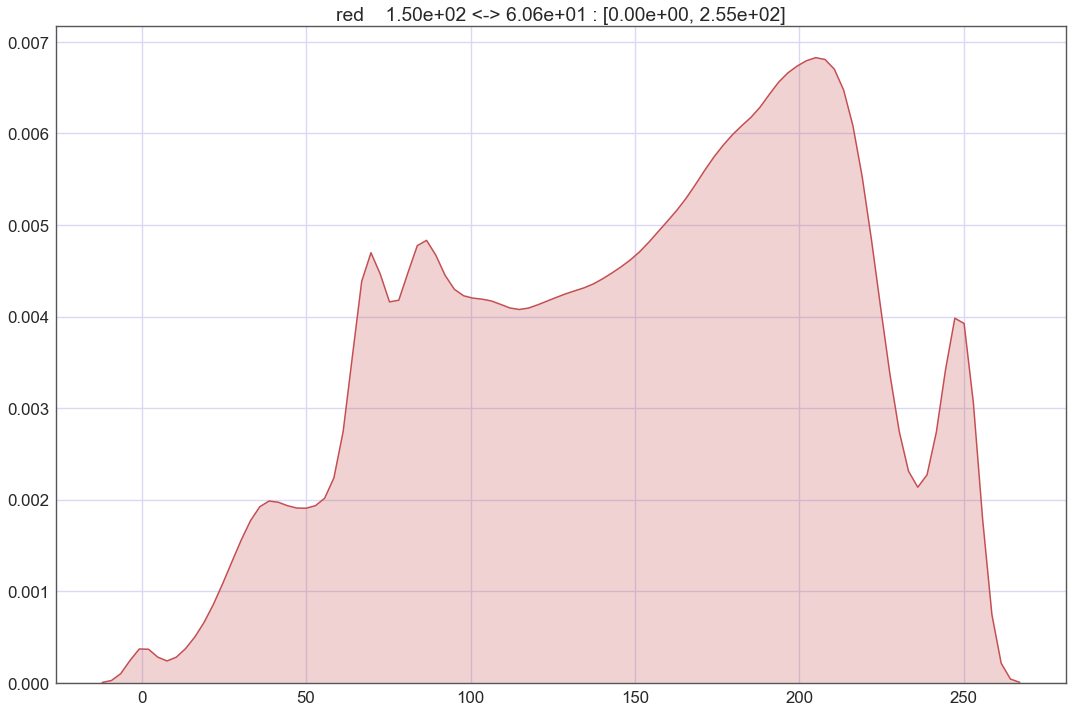

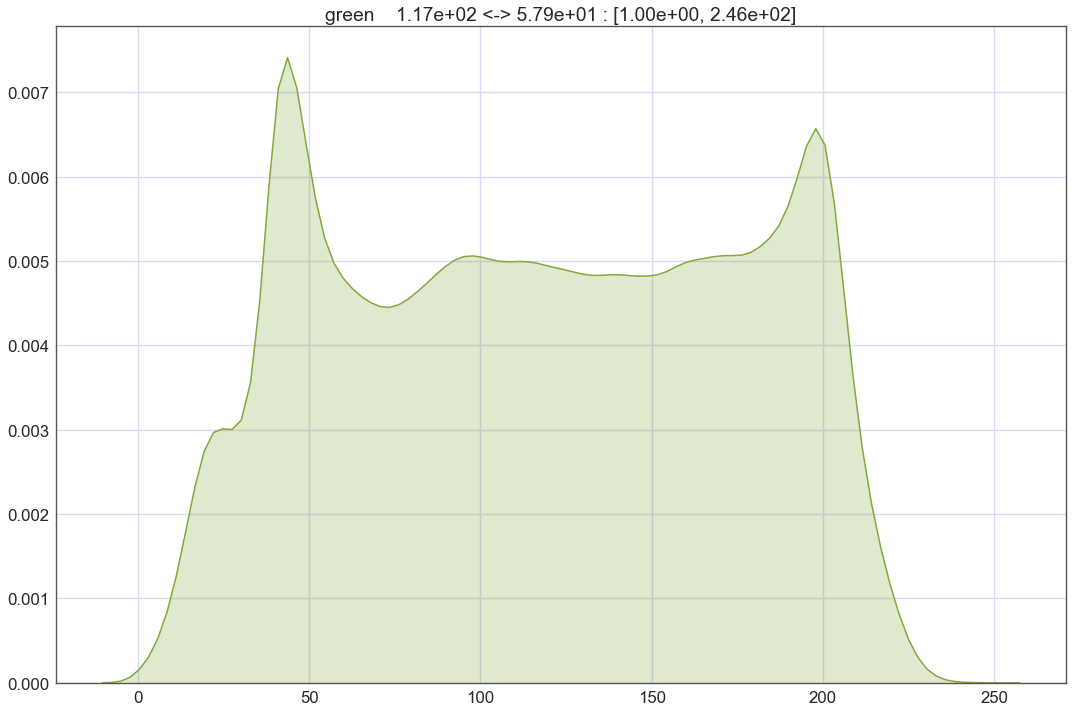

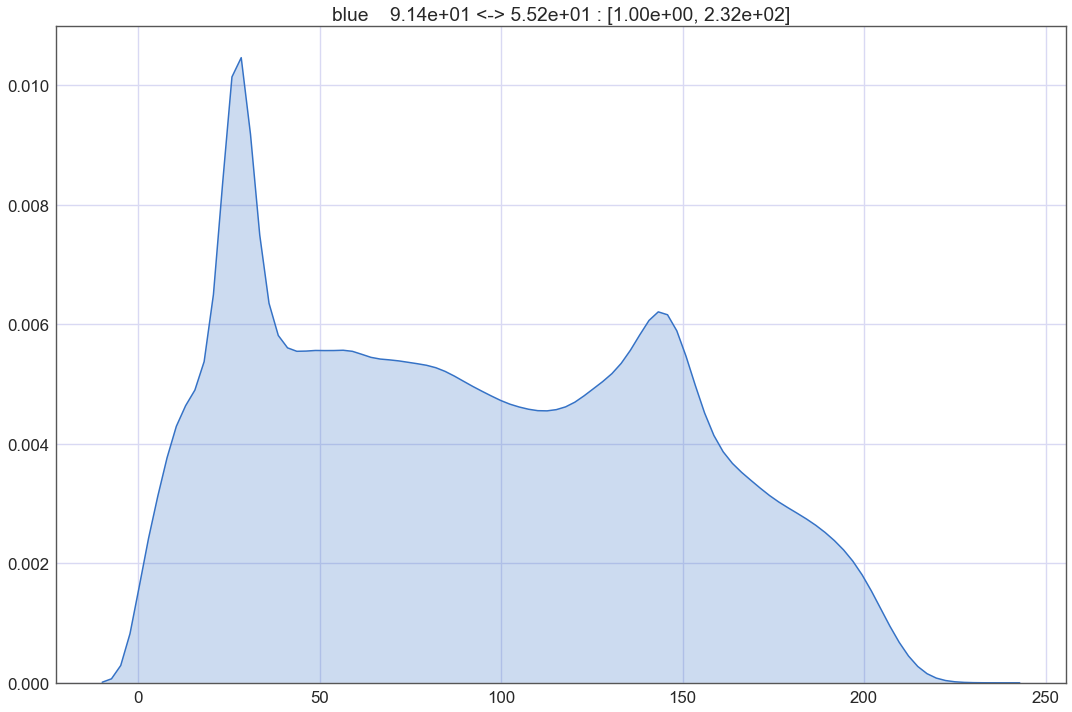

In [148]:
summarize_tensor(sample_img[:, :, 0], 'red', 'r')
plt.show()
summarize_tensor(sample_img[:, :, 1], 'green', 'g')
plt.show()
summarize_tensor(sample_img[:, :, 2], 'blue', 'b')
plt.show()

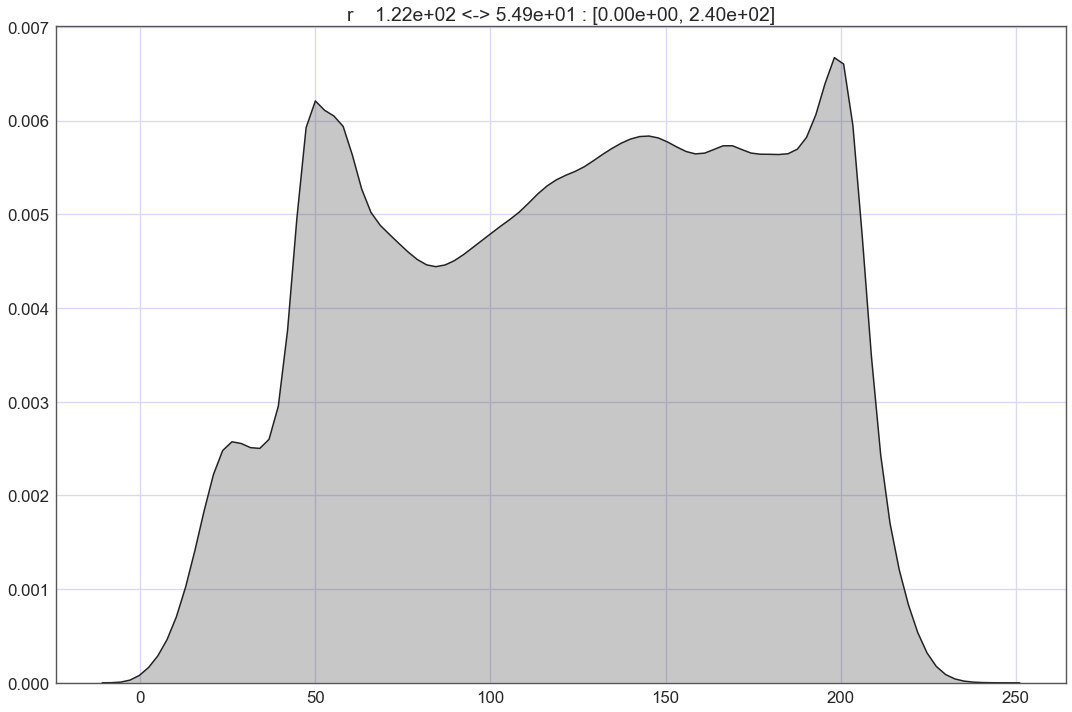

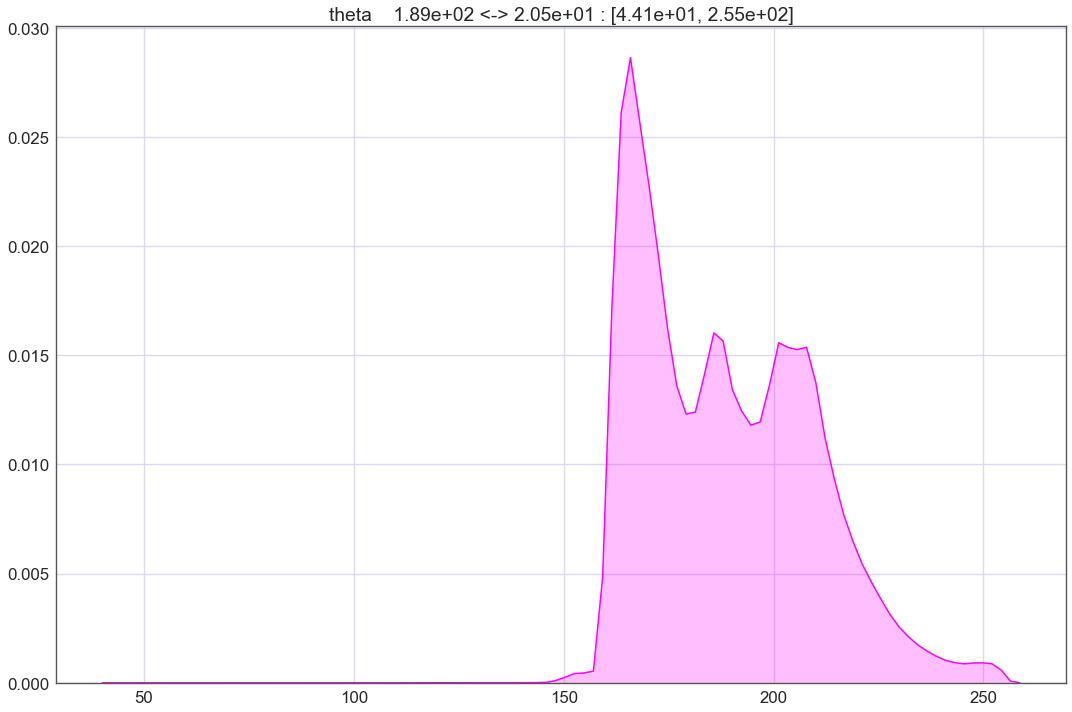

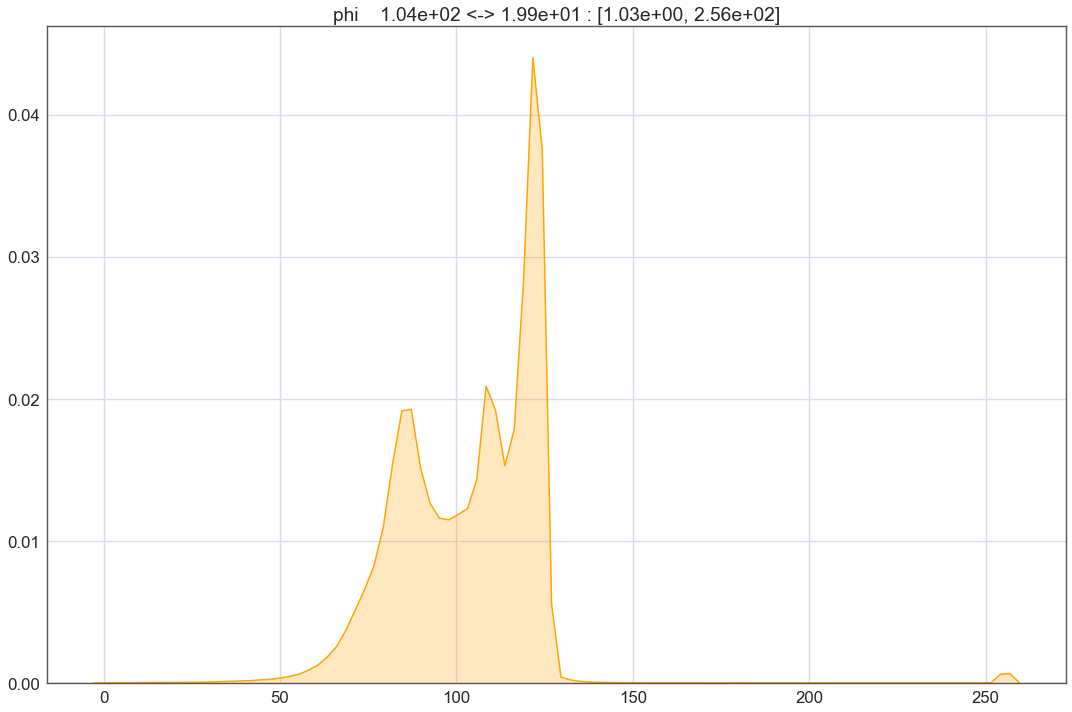

In [155]:
summarize_tensor(spherical_sample_img[:, :, 0], 'r', 'k')
plt.show()
summarize_tensor(spherical_sample_img[:, :, 1], 'theta', 'magenta')
plt.show()
summarize_tensor(spherical_sample_img[:, :, 2], 'phi', 'orange')
plt.show()